<a href="https://colab.research.google.com/github/NecroAspect/CNN-project-Cats-vs-Dogs-classifier-/blob/main/Cat_vs_dog_classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:10<00:00, 121MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s]


In [ ]:
# unzip the dogs-vs-cats.zip file
!unzip dogs-vs-cats.zip

In [ ]:
# read the test and train data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = './train',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = './test',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
print(type(train_ds))
print(type(validation_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
# show train_ds
for data_batch, labels_batch in train_ds.take(1):
    print(data_batch.shape)
    print(labels_batch.shape)

(32, 256, 256, 3)
(32,)


In [ ]:
# see the value ranges of each image in train_ds array
data_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.5285003 , 0.54810816, 0.55987287],
        [0.5288866 , 0.54849446, 0.56025916],
        [0.5328905 , 0.5475567 , 0.5596614 ],
        ...,
        [0.6485218 , 0.7230316 , 0.746561  ],
        [0.6459219 , 0.7204317 , 0.7439611 ],
        [0.64797026, 0.72248006, 0.74600947]],

       [[0.5254902 , 0.54236364, 0.55412835],
        [0.52872777, 0.54560125, 0.55736595],
        [0.5407079 , 0.5468624 , 0.56180435],
        ...,
        [0.6485218 , 0.7230316 , 0.746561  ],
        [0.6460808 , 0.7205906 , 0.74412   ],
        [0.648246  , 0.72275585, 0.74628526]],

       [[0.5228401 , 0.5366192 , 0.54901963],
        [0.5284237 , 0.54220283, 0.5546032 ],
        [0.5432751 , 0.54592526, 0.5622472 ],
        ...,
        [0.6485218 , 0.7230316 , 0.746561  ],
        [0.6408778 , 0.7161201 , 0.73928326],
        [0.6392157 , 0.71499693, 0.7378906 ]],

       ...,

       [[0.26449907, 0.25665593, 0.19783242],
        [0.28

In [ ]:
# normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=8, validation_data=validation_ds)

Epoch 1/8
625/625 [==============================] - 67s 102ms/step - loss: 1.2545 - accuracy: 0.5943 - val_loss: 0.6371 - val_accuracy: 0.6470
Epoch 2/8
625/625 [==============================] - 64s 101ms/step - loss: 0.5728 - accuracy: 0.6967 - val_loss: 0.5768 - val_accuracy: 0.7142
Epoch 3/8
625/625 [==============================] - 69s 110ms/step - loss: 0.5295 - accuracy: 0.7429 - val_loss: 0.6128 - val_accuracy: 0.6604
Epoch 4/8
625/625 [==============================] - 65s 104ms/step - loss: 0.4582 - accuracy: 0.7819 - val_loss: 0.5426 - val_accuracy: 0.7566
Epoch 5/8
625/625 [==============================] - 65s 104ms/step - loss: 0.3951 - accuracy: 0.8142 - val_loss: 0.5047 - val_accuracy: 0.7596
Epoch 6/8
625/625 [==============================] - 64s 101ms/step - loss: 0.3537 - accuracy: 0.8374 - val_loss: 1.3088 - val_accuracy: 0.6660
Epoch 7/8
625/625 [==============================] - 64s 101ms/step - loss: 0.3011 - accuracy: 0.8597 - val_loss: 1.1119 - val_accuracy:

In [ ]:
# print train accuracy
model.evaluate(train_ds)

625/625 [==============================] - 31s 49ms/step - loss: 0.3362 - accuracy: 0.8629


[0.3361666202545166, 0.86285001039505]

In [ ]:
# print validation accuracy
model.evaluate(validation_ds)

157/157 [==============================] - 9s 54ms/step - loss: 0.6425 - accuracy: 0.7752


[0.6424603462219238, 0.7752000093460083]

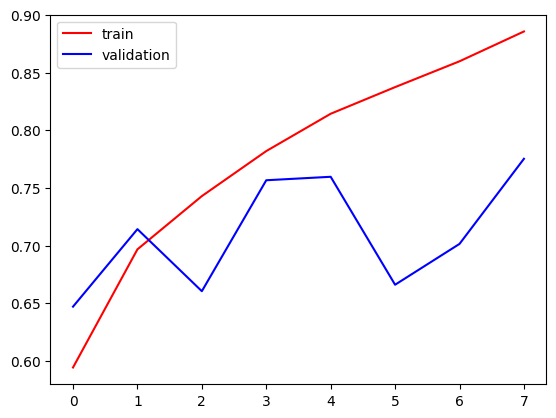

In [ ]:
#plot graphs for training and validation accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

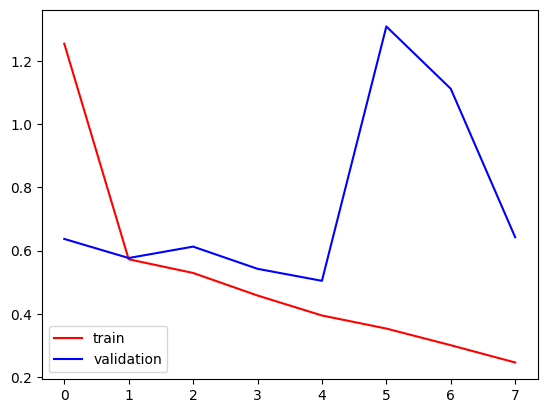

In [ ]:
#plot graphs for training and validation loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# 1. Data Augmentation
# 2. Dropout
# 3. Batch Normalization
# 4. L1/L2 Regularization
# 5. Add more data
# 6. reduce complexity

In [ ]:
# predict dog vs cat using the trained model

import cv2
test_img = cv2.imread('./test/dogs/dog.100.jpg')

In [ ]:
# !wget -O test_img.jpg https://thumbs.dreamstime.com/b/beagle-dog-isolated-white-background-purebred-103538194.jpg
# test_img = cv2.imread('./test_img.jpg')

--2024-06-07 04:38:42--  https://thumbs.dreamstime.com/b/beagle-dog-isolated-white-background-purebred-103538194.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26223 (26K) [image/jpeg]
Saving to: ‘test_img.jpg’

test_img.jpg        100%[===================>]  25.61K  --.-KB/s    in 0.002s  

2024-06-07 04:38:42 (15.0 MB/s) - ‘test_img.jpg’ saved [26223/26223]



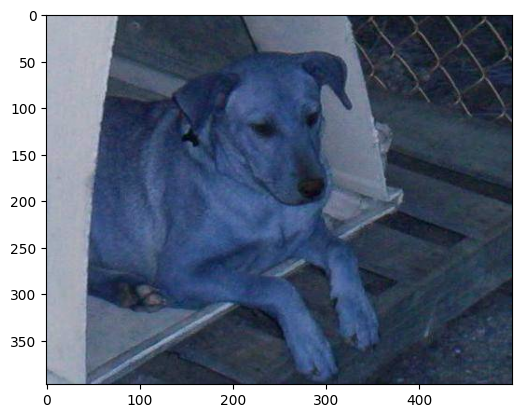

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(397, 500, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))
test_img = test_img.reshape(1,256,256,3)

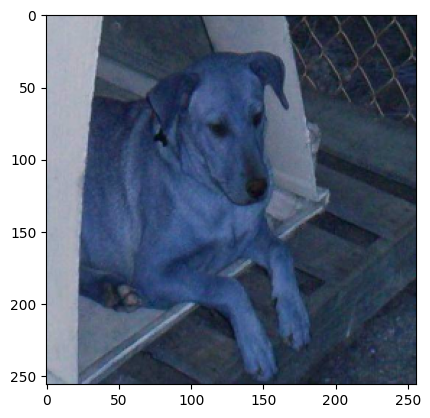

In [ ]:
plt.imshow(test_img[0])

In [ ]:
test_img.shape

(1, 256, 256, 3)

In [ ]:
model.predict(test_img)
# required label : 1 (dog)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [ ]:
!wget -O test_img.jpg https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg
test_img = cv2.imread('./test_img.jpg')

--2024-06-07 04:42:48--  https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40670 (40K) [image/jpeg]
Saving to: ‘test_img.jpg’

test_img.jpg        100%[===================>]  39.72K  --.-KB/s    in 0.008s  

2024-06-07 04:42:48 (5.09 MB/s) - ‘test_img.jpg’ saved [40670/40670]



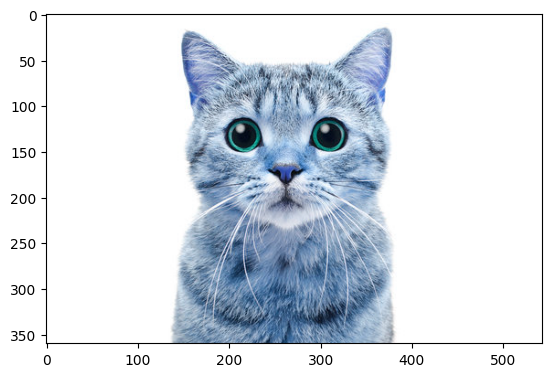

In [ ]:
# show test image
plt.imshow(test_img)

In [ ]:
test_img.shape

(360, 543, 3)

In [ ]:
# resize and reshape the image
test_img = cv2.resize(test_img, (256,256))
test_img = test_img.reshape(1,256,256,3)

In [ ]:
test_img.shape

(1, 256, 256, 3)

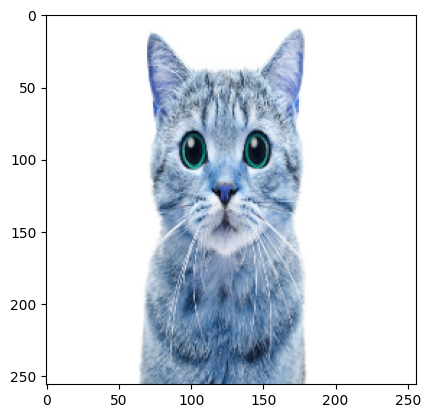

In [ ]:
plt.imshow(test_img[0])

In [ ]:
model.predict(test_img)
# required label : 0 (cat)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)